In [1]:
# Scikit-learn models:
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

# Base packages:
from IPython.display import SVG
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Load data:
data = pd.read_csv("../data/Final_Results_Pupil_v2.csv", sep=";")

# Print first 5 rows:
data[['Participant','MPDC']]
data

,Participant,World,TrialName,Task,Duration,Milliseconds,Errors,Baseline,APCPS,MPD,...,MPDC_A,SD_A,PeakDilation_A,Latencytopeak_A,Changeposition_A,Attempts_A,ChangepositionAttemps_A,Errorschangeposition_A,ErrorsAttemps_A,Totalerrors_A
0,1,2,2_5,25,00:00:45,44785,0,"30,7896",",0409","32,049",...,"2,9259","1,5489","6,0057",65,2,0,2,3,1,3
1,3,2,2_4,24,00:01:53,112464,1,"18,1298",",0524","19,0801",...,"2,3878","1,3852","4,9936",33,0,2,2,0,2,2
2,6,2,2_4,24,00:00:40,39458,0,"27,0984",",0869","29,4543",...,"2,2689",",8128","4,0133",9,0,0,0,0,0,0
3,6,2,2_5,25,00:00:46,45055,0,"29,3381",",0288","30,1824",...,"1,3159",",8638","3,0021",38,1,0,1,1,0,1
4,7,2,2_4,24,00:02:28,147727,7,"25,5965",",0839","27,745",...,"4,3299","1,0139","6,9429",14,0,0,0,0,0,0
5,7,2,2_5,25,00:00:23,22825,0,"27,5585",",0029","27,639",...,"3,2252","1,0105","5,764",151,5,9,14,10,14,19
6,8,2,2_4,24,00:01:47,106656,4,"19,1137",",0789","20,6213",...,"3,0102","1,1218","5,8991",28,0,0,0,0,0,0
7,9,2,2_4,24,00:00:36,35397,0,"23,5228",",0344","24,3316",...,"3,65",",9193","5,3706",5,0,0,0,0,0,0
8,9,2,2_5,25,00:00:32,31082,0,"20,5479",",1786","24,2184",...,"1,6062",",7782","3,5325",36,2,2,4,4,4,6
9,10,2,2_4,24,4.8596064814814812E-4,41987,1,"18,3643",",197","21,9812",...,"2,5888","1,1392","5,0655",80,6,0,6,6,0,6


In [3]:
# Create testing indices.
# Subjects: 3, 12, 20
test_idx = [1, 13, 14, 22, 23, 41, 42, 49]
print("Testing indices:", test_idx)

Testing indices: [1, 13, 14, 22, 23, 41, 42, 49]


In [4]:
def clean_data(data):
    """Utlity function to parse data."""
    for col in range(data.shape[1]):
        for row in range(data.shape[0]):
            try:
                data[row, col] = float(data[row, col].replace(',', '.'))
            except:
                pass

In [5]:
# Create features and labels (data):
features = data[['Errors', 'Milliseconds', 'MPDC', 'PeakDilation']].values
labels = data[['World']].values
clean_data(features)

# Create features and labels (names):
feature_names = np.array(['Errors', 'Milliseconds', 'MPDC', 'PeakDilation'])
label_names = np.array(['World 1', 'World 2'])

# Create training data:
train_data = np.delete(features, test_idx, axis=0)
train_lbls = np.delete(labels, test_idx)

# Create testing data:
test_data = features[test_idx]
test_lbls = labels[test_idx]

In [6]:
# Build classifier:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_lbls)

# Predict data:
prediction = clf.predict(test_data)
print("Predictions: \t", prediction)

# Compare with labels:
print("Testing labels: ", test_lbls.flatten())
acc_sc = accuracy_score(test_lbls, prediction)
print("Accuracy score: {}%".format(acc_sc*100))

Predictions: 	 [2 4 4 2 2 4 4 4]
Testing labels:  [2 2 2 2 2 4 4 4]
Accuracy score: 75.0%


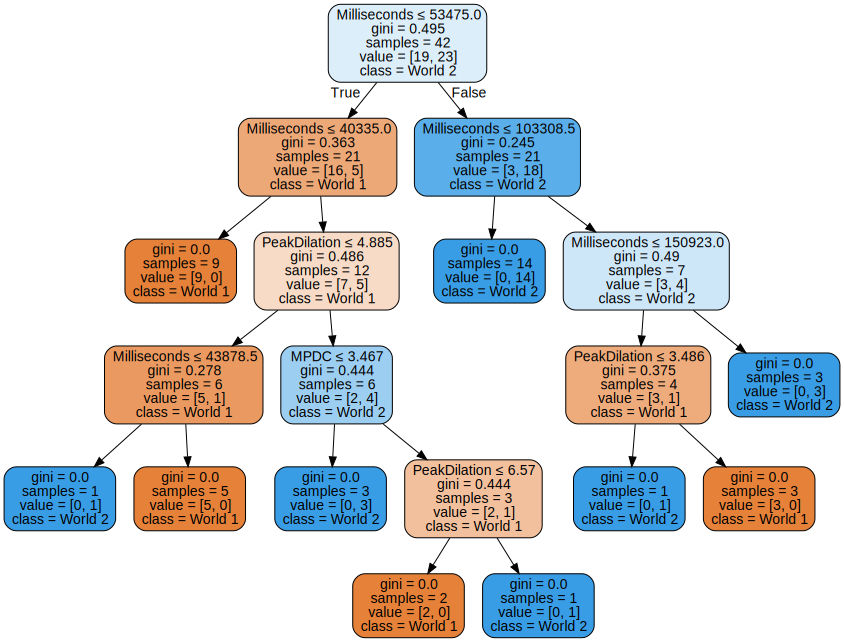

In [7]:
# Visualize decision tree:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=label_names, 
                         rounded=True, filled=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
svg_img = graph.pipe(format='svg')

# Save as svg:
with open('../imgs/DecisionTree.svg','wb') as f:
    f.write(svg_img)

# Display tree:
SVG(svg_img)

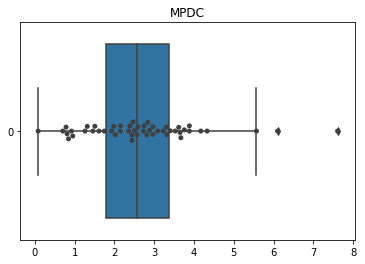

In [8]:
plt.title("MPDC")
sns.boxplot(data=features[:,2], orient='h')
sns.swarmplot(data=features[:,2], orient='h', color='0.25')

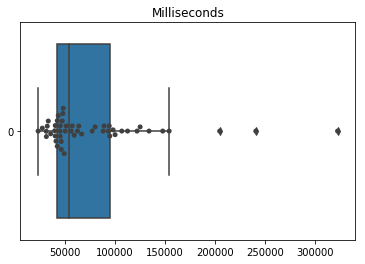

In [9]:
plt.title("Milliseconds")
sns.boxplot(data=features[:,1], orient='h')
sns.swarmplot(data=features[:,1], orient='h', color='0.25')

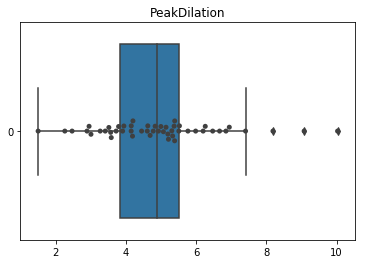

In [10]:
plt.title("PeakDilation")
sns.boxplot(data=features[:,3], orient='h')
sns.swarmplot(data=features[:,3], orient='h', color='0.25')